## Mark-1 MRI Reconstruction using Basic Autoencoder

In [1]:

import h5py as hf
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as img

#### Dataset Description :

No: of Training Samples : 30

No: of Testing Samples : 10

Image Dimensions : 192x192

In [2]:
train_path = 'D:/MRIdata/train/'
test_path = 'D:/MRIdata/test/'

train_filenames = os.listdir(train_path)
train_files = []

for filename in train_filenames :
    sample = img.imread(train_path+filename,'r')
    train_files.append(sample)
    
test_filenames = os.listdir(test_path)
test_files = []

for filename in test_filenames :
    sample = img.imread(test_path+filename,'r')
    test_files.append(sample)

In [3]:
np.shape(train_files)

(30, 192, 192)

In [4]:
np.shape(test_files)

(10, 192, 192)

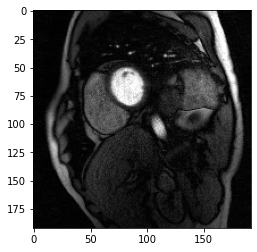

In [5]:
plt.imshow(train_files[4],cmap = 'gray')

#### Reshaping the dataset for the Neural Network :

In [6]:
train = np.array(train_files)
test =  np.array(test_files)
train = train.reshape((30,192,192,1))
test = test.reshape((10,192,192,1))

In [7]:
train.shape

(30, 192, 192, 1)

#### Masking (UnderSampling):

Here, each training sample is multiplied with a binary mask which undersamples the input to 25%.
The masking matrix has 25% of its elements 1 and other zeroes. It is then multiplied with each training image.

In [8]:
def rand_bin_array(K, N):
    arr = np.zeros(N*N)
    k = int(K*N*N)
    arr[:k]  = 1
    np.random.shuffle(arr)
    return arr.reshape((N,N))

In [9]:
train_y = train.copy()
for i in range(len(train)) :
    train[i] = np.dot(train[i].reshape(192,192),rand_bin_array(0.25,192)).reshape(192,192,1)
    

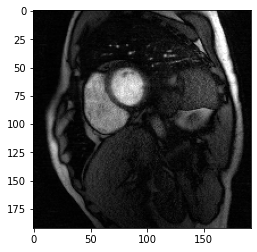

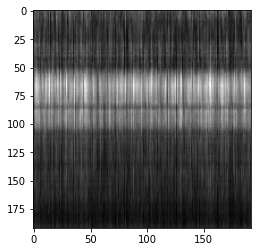

In [10]:
plt.imshow(train_y[1].reshape(192,192),cmap = 'gray')
plt.show()
plt.imshow(train[1].reshape(192,192),cmap = 'gray')
plt.show()

# Model : Basic AutoEncoder

The model is trained on the undersampled images and forced to recreate the original image. Thus undersamples images are  the input and the original images are the target variable

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [12]:
encoder = Sequential()
encoder.add(Flatten(input_shape=(192,192,1)))
encoder.add(Dense(800,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))

In [13]:
decoder = Sequential()
decoder.add(Dense(100,input_shape=[50],activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(800,activation='relu'))
decoder.add(Dense(192 * 192, activation="sigmoid"))
decoder.add(Reshape([192, 192]))

In [14]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['mse'])

In [15]:
autoencoder.fit(train,train_y, epochs=500,validation_data=[test,test])

Train on 30 samples, validate on 10 samples
Epoch 1/500
30/30 [==============================] - 3s 83ms/sample - loss: 0.6935 - mse: 0.1620 - val_loss: 0.6931 - val_mse: 0.1524
Epoch 2/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6931 - mse: 0.1618 - val_loss: 0.6931 - val_mse: 0.1524
Epoch 3/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6929 - mse: 0.1617 - val_loss: 0.6931 - val_mse: 0.1524
Epoch 4/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6926 - mse: 0.1616 - val_loss: 0.6931 - val_mse: 0.1524
Epoch 5/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6922 - mse: 0.1614 - val_loss: 0.6931 - val_mse: 0.1524
Epoch 6/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6914 - mse: 0.1610 - val_loss: 0.6930 - val_mse: 0.1524
Epoch 7/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6899 - mse: 0.1602 - val_loss: 0.6929 - val_mse: 0.1523
Epoch 8/500
30/30 [=====

Epoch 62/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6910 - mse: 0.1607 - val_loss: 0.6911 - val_mse: 0.1514
Epoch 63/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6909 - mse: 0.1607 - val_loss: 0.6910 - val_mse: 0.1514
Epoch 64/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6908 - mse: 0.1607 - val_loss: 0.6910 - val_mse: 0.1513
Epoch 65/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6908 - mse: 0.1606 - val_loss: 0.6909 - val_mse: 0.1513
Epoch 66/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6907 - mse: 0.1606 - val_loss: 0.6909 - val_mse: 0.1513
Epoch 67/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6906 - mse: 0.1606 - val_loss: 0.6908 - val_mse: 0.1513
Epoch 68/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6905 - mse: 0.1605 - val_loss: 0.6908 - val_mse: 0.1512
Epoch 69/500
30/30 [==============================] - 0s 2ms/s

Epoch 123/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6880 - mse: 0.1592 - val_loss: 0.6880 - val_mse: 0.1499
Epoch 124/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6879 - mse: 0.1592 - val_loss: 0.6880 - val_mse: 0.1498
Epoch 125/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6878 - mse: 0.1592 - val_loss: 0.6879 - val_mse: 0.1498
Epoch 126/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6878 - mse: 0.1591 - val_loss: 0.6878 - val_mse: 0.1498
Epoch 127/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6877 - mse: 0.1591 - val_loss: 0.6878 - val_mse: 0.1497
Epoch 128/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6876 - mse: 0.1591 - val_loss: 0.6877 - val_mse: 0.1497
Epoch 129/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6875 - mse: 0.1590 - val_loss: 0.6876 - val_mse: 0.1497
Epoch 130/500
30/30 [==============================] - 

Epoch 184/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6827 - mse: 0.1566 - val_loss: 0.6829 - val_mse: 0.1473
Epoch 185/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6826 - mse: 0.1566 - val_loss: 0.6828 - val_mse: 0.1472
Epoch 186/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6825 - mse: 0.1565 - val_loss: 0.6826 - val_mse: 0.1472
Epoch 187/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6824 - mse: 0.1564 - val_loss: 0.6825 - val_mse: 0.1471
Epoch 188/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6823 - mse: 0.1564 - val_loss: 0.6824 - val_mse: 0.1471
Epoch 189/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6821 - mse: 0.1563 - val_loss: 0.6823 - val_mse: 0.1470
Epoch 190/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6820 - mse: 0.1563 - val_loss: 0.6822 - val_mse: 0.1469
Epoch 191/500
30/30 [==============================] - 

Epoch 245/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6707 - mse: 0.1506 - val_loss: 0.6709 - val_mse: 0.1413
Epoch 246/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6703 - mse: 0.1504 - val_loss: 0.6706 - val_mse: 0.1411
Epoch 247/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6700 - mse: 0.1502 - val_loss: 0.6702 - val_mse: 0.1410
Epoch 248/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6696 - mse: 0.1501 - val_loss: 0.6699 - val_mse: 0.1408
Epoch 249/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6692 - mse: 0.1499 - val_loss: 0.6695 - val_mse: 0.1406
Epoch 250/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.6688 - mse: 0.1497 - val_loss: 0.6691 - val_mse: 0.1404
Epoch 251/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.6684 - mse: 0.1495 - val_loss: 0.6687 - val_mse: 0.1402
Epoch 252/500
30/30 [==============================] - 

Epoch 306/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.5770 - mse: 0.1045 - val_loss: 0.5744 - val_mse: 0.0939
Epoch 307/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.5702 - mse: 0.1013 - val_loss: 0.5673 - val_mse: 0.0906
Epoch 308/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.5629 - mse: 0.0978 - val_loss: 0.5595 - val_mse: 0.0869
Epoch 309/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.5547 - mse: 0.0940 - val_loss: 0.5510 - val_mse: 0.0829
Epoch 310/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.5457 - mse: 0.0897 - val_loss: 0.5416 - val_mse: 0.0785
Epoch 311/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.5358 - mse: 0.0851 - val_loss: 0.5312 - val_mse: 0.0738
Epoch 312/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.5248 - mse: 0.0801 - val_loss: 0.5198 - val_mse: 0.0686
Epoch 313/500
30/30 [==============================] - 

Epoch 367/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3116 - mse: 0.0057 - val_loss: 0.3314 - val_mse: 0.0038
Epoch 368/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3114 - mse: 0.0057 - val_loss: 0.3313 - val_mse: 0.0037
Epoch 369/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3113 - mse: 0.0057 - val_loss: 0.3311 - val_mse: 0.0037
Epoch 370/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3112 - mse: 0.0057 - val_loss: 0.3310 - val_mse: 0.0037
Epoch 371/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3111 - mse: 0.0057 - val_loss: 0.3308 - val_mse: 0.0037
Epoch 372/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3110 - mse: 0.0057 - val_loss: 0.3307 - val_mse: 0.0037
Epoch 373/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3109 - mse: 0.0056 - val_loss: 0.3306 - val_mse: 0.0036
Epoch 374/500
30/30 [==============================] - 

Epoch 428/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3089 - mse: 0.0054 - val_loss: 0.3276 - val_mse: 0.0033
Epoch 429/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3089 - mse: 0.0054 - val_loss: 0.3275 - val_mse: 0.0032
Epoch 430/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3088 - mse: 0.0054 - val_loss: 0.3275 - val_mse: 0.0032
Epoch 431/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.3088 - mse: 0.0054 - val_loss: 0.3275 - val_mse: 0.0032
Epoch 432/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3088 - mse: 0.0054 - val_loss: 0.3275 - val_mse: 0.0032
Epoch 433/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.3088 - mse: 0.0054 - val_loss: 0.3275 - val_mse: 0.0032
Epoch 434/500
30/30 [==============================] - 0s 3ms/sample - loss: 0.3088 - mse: 0.0054 - val_loss: 0.3275 - val_mse: 0.0032
Epoch 435/500
30/30 [==============================] - 

Epoch 489/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3085 - mse: 0.0054 - val_loss: 0.3269 - val_mse: 0.0032
Epoch 490/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3085 - mse: 0.0054 - val_loss: 0.3269 - val_mse: 0.0032
Epoch 491/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3085 - mse: 0.0054 - val_loss: 0.3269 - val_mse: 0.0032
Epoch 492/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3085 - mse: 0.0054 - val_loss: 0.3269 - val_mse: 0.0032
Epoch 493/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3085 - mse: 0.0054 - val_loss: 0.3269 - val_mse: 0.0032
Epoch 494/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3085 - mse: 0.0054 - val_loss: 0.3269 - val_mse: 0.0032
Epoch 495/500
30/30 [==============================] - 0s 2ms/sample - loss: 0.3085 - mse: 0.0054 - val_loss: 0.3269 - val_mse: 0.0032
Epoch 496/500
30/30 [==============================] - 

<AxesSubplot:>

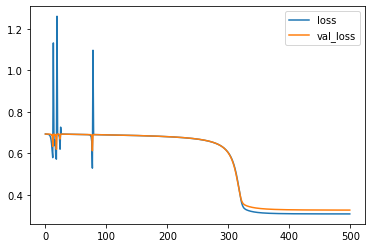

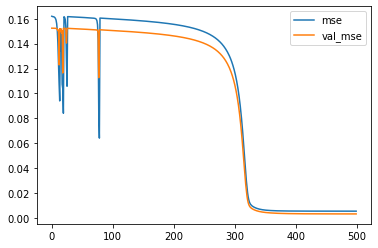

In [16]:
import pandas as pd
stats  = pd.DataFrame(autoencoder.history.history)
stats[['loss','val_loss']].plot()
stats[['mse','val_mse']].plot()

#### Testing out the Reconstruction

In [17]:
sample= train[:4]
pred = autoencoder.predict(sample)

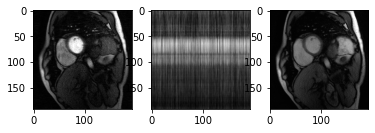

In [18]:

f,axes = plt.subplots(1,3)
axes[0].imshow(train_y[2],cmap = 'gray')
axes[1].imshow(train[2],cmap = 'gray')
axes[2].imshow(pred[2],cmap = 'gray')
